In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [6]:
img = cv2.imread('/mnt/external-images-pvc/david/liveCellPainting/raw_data/exp156/Images/r06c23f01p01-ch2sk1fk1fl1.tiff')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel, iterations = 1)

dist = cv2.distanceTransform(closing, cv2.DIST_L2, 3)

ret, dist1 = cv2.threshold(dist, 0.6*dist.max(), 255, 0)

markers = np.zeros(dist.shape, dtype=np.int32)
dist_8u = dist1.astype('uint8')
contours, _ = cv2.findContours(dist_8u, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    cv2.drawContours(markers, contours, i, (i+1), -1)
    
markers = cv2.circle(markers, (15,15), 5, len(contours)+1, -1)

markers = cv2.watershed(img, markers)
img[markers == -1] = [0,0,255]

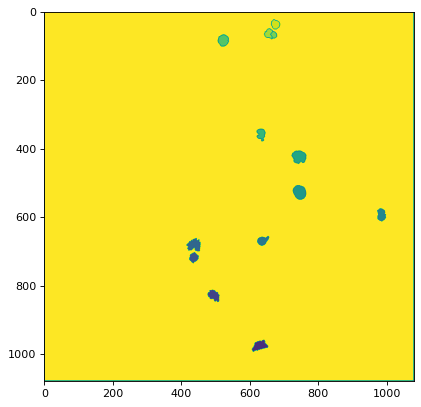

In [7]:
figure(figsize=(6, 6), dpi=80)
plt.imshow(markers)

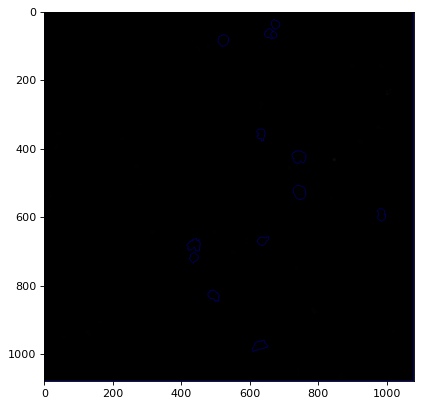

In [9]:
figure(figsize=(6, 6), dpi=80)
plt.imshow(img)